# 定义回归模型

In [1]:
import numpy as np
def linear_loss(X, y, w, b):
    """
    输入:
        X->变量矩阵
        y->标签向量
        w->权重矩阵
        b->偏置
    输出:
        y_hat->线性回归预测值
    """
    # 训练样本量
    num_train = X.shape[0]
    # 训练特征量
    num_feawture = X.shape[1]
    # 线性回归预测值
    y_hat = np.dot(X, w) + b;
    # 计算均方损失
    loss = np.sum((y_hat - y)**2)/num_train
    # 基于均方损失对权重系数的一阶梯度
    dw = np.dot(X.T, (y_hat - y))/num_train
    # 基于均方损失对偏置的一阶梯度
    db = np.sum((y_hat - y))/num_train
    return y_hat, loss, dw, db

# 初始化模型参数

In [2]:
def init_params(dims):
    # 初始化权重系数为零向量
    w = np.zeros((dims,1))
    # 初始化偏置参数为零
    b = 0
    return w, b

# 迭代训练

In [24]:
def linear_train(X, y, learning_rate = 0.01, train_steps = 10000):
    """
    输入:
        X->变量矩阵
        y->标签向量
        learning_rate->学习率（默认0.01）
        train_steps->训练次数（默认10000）
    输出:
        loss_his->当前迭代的损失
        parmes->当前迭代步优化后的参数
        grads->当前迭代步的梯度
    """
    # 记录训练损失
    loss_his = []
    # 初始化模型参数
    w, b = init_params(X.shape[1])
    # 迭代训练
    for i in range(1, train_steps):
        # 计算当前迭代的预测值
        y_hat, loss, dw, db = linear_loss(X, y, w, b)
        # 基于梯度下降法的参更新
        w += -learning_rate * dw
        b += -learning_rate * db
        # 记录当前迭代的损失
        loss_his.append(loss)
        # 每10000次迭代打印当前损失信息
        if (i+1)%10000==0:
            print("epoch %d loss %f"%(i+1, loss))
        # 将当前迭代步优化后的参数保存到字典中
        params={
            'w':w,
            'b':b
        }
        # 将当前迭代步的梯度保存到字典中
        grads={
            'dw':dw,
            'db':db
        }
    return loss_his, params, grads

# 预测函数

In [4]:
def predict(X, params):
    """
    输入:
        X->测试数据集
        params->模型训练参数
    输出:
        y_pred->模型预测结果
    """
    # 获取模型参数
    w = params['w']
    b = params['b']
    # 预测
    y_pred = np.dot(X, w) + b
    return y_pred

# 定义R2系数函数

In [5]:
def r2_score(y_test, y_pred):
    """
    输入:
        y_test->测试集标签值
        y_pred->测试集预测值
    输出:
        r2->R2系数
    """
    # 测试标签均值
    y_avg = np.mean(y_test)
    # 总离差平方和
    ss_tot = np.sum((y_test - y_avg)**2)
    # 残差平方和
    ss_res = np.sum((y_test - y_pred)**2)
    # R2计算
    r2 = 1 - (ss_res/ss_tot)
    return r2

# 糖尿病数据测试

## 导入数据，数据预处理

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle
# 获取diabetes数据集
diabetes = load_diabetes()
# 获取输入和标签
data, target = diabetes.data, diabetes.target 
# 打乱数据集
X, y = shuffle(data, target, random_state = 4)

# 按照8/2划分训练集和测试集
offset = int(X.shape[0] * 0.8)
X_train, X_test, y_train, y_test = X[:offset], X[offset:], y[:offset], y[offset:]

# 将训练集改为列向量的形式
y_train = y_train.reshape((-1,1))
# 将验证集改为列向量的形式
y_test = y_test.reshape((-1,1))
# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (353, 10)
X_test's shape:  (89, 10)
y_train's shape:  (353, 1)
y_test's shape:  (89, 1)


## 训练

In [7]:
# 线性回归模型训练
loss_his, params, grads = linear_train(X_train, y_train, 0.01, 200000)
# 打印训练后得到模型参数
print(params)

epoch 10000 loss 3955.973524
epoch 20000 loss 3394.783822
epoch 30000 loss 3162.907663
epoch 40000 loss 3037.694639
epoch 50000 loss 2962.297627
epoch 60000 loss 2914.979583
epoch 70000 loss 2884.667846
epoch 80000 loss 2864.966543
epoch 90000 loss 2851.997618
epoch 100000 loss 2843.355202
epoch 110000 loss 2837.524343
epoch 120000 loss 2833.539579
epoch 130000 loss 2830.779082
epoch 140000 loss 2828.838432
epoch 150000 loss 2827.452181
epoch 160000 loss 2826.444550
epoch 170000 loss 2825.698126
epoch 180000 loss 2825.133796
epoch 190000 loss 2824.697784
{'w': array([[ -67.90121906],
       [-233.0298154 ],
       [ 561.19805858],
       [ 293.42733784],
       [ -52.61978545],
       [-109.03917202],
       [-230.05507844],
       [ 117.37083213],
       [ 468.63363993],
       [  93.45246676]]), 'b': 151.89837963350448}


## 训练评估

In [8]:
# 基于测试集的预测
y_pred = predict(X_test, params)
# 打印前五个预测值
print(y_pred[:5])
print(y_test[:5])
print(r2_score(y_test, y_pred))

[[ 67.08394194]
 [163.68682839]
 [126.40526186]
 [114.4473102 ]
 [ 84.6845359 ]]
[[ 59.]
 [ 58.]
 [ 42.]
 [183.]
 [ 96.]]
0.42838279544288704


## 画图

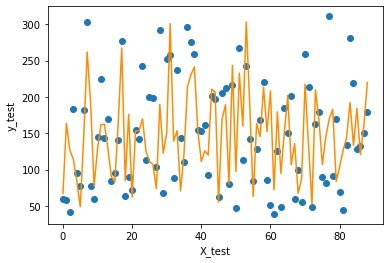

In [9]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show();

# 散点数据测试

## 载入数据，数据预处理

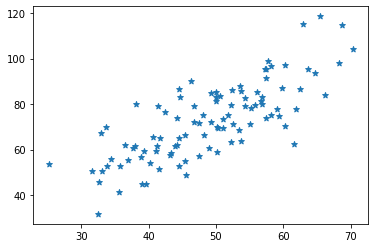

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./LRdata.txt")
plt.scatter(data["x"], data["y"], marker = "*")

# 归一化处理

In [11]:
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()
_data_simple = trans.fit_transform(data)
_data_simple = pd.DataFrame(_data_simple, columns = ["x", "y"])
_data_simple.describe()

,x,y
count,1.000000e+02,1.000000e+02
mean,9.592327e-16,1.043610e-16
std,1.005038e+00,1.005038e+00
min,-2.457313e+00,-2.475344e+00
25%,-7.663995e-01,-7.207656e-01
50%,6.977331e-02,-3.351549e-02
75%,8.047713e-01,6.322912e-01
max,2.205484e+00,2.766638e+00


In [21]:
# 获取输入和标签
data, target = _data_simple["x"], _data_simple["y"]
data = np.array(data)
data = data.reshape((-1,1))

target = np.array(target)
target = target.reshape((-1,1))
# 打乱数据集
X, y = shuffle(data, target, random_state = 13)

# 按照8/2划分训练集和测试集
offset = int(X.shape[0] * 0.8)
X_train, X_test, y_train, y_test = X[:offset], X[offset:], y[:offset], y[offset:]

# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (80, 1)
X_test's shape:  (20, 1)
y_train's shape:  (80, 1)
y_test's shape:  (20, 1)


In [26]:
loss_his, params, grads = linear_train(X_train, y_train, 0.01, 50000)
# 打印训练后得到模型参数
print(params)

epoch 10000 loss 0.364317
epoch 20000 loss 0.364317
epoch 30000 loss 0.364317
epoch 40000 loss 0.364317
epoch 50000 loss 0.364317
{'w': array([[0.80321166]]), 'b': -0.056084513918907127}


In [14]:
y_pred = predict(X_test, params)
print(r2_score(y_test, y_pred))

0.5329032659312245
